This is an example of determining the clusters in a graph using the Girvan-Newman Algorithm!
How many vertices in the graph? 8


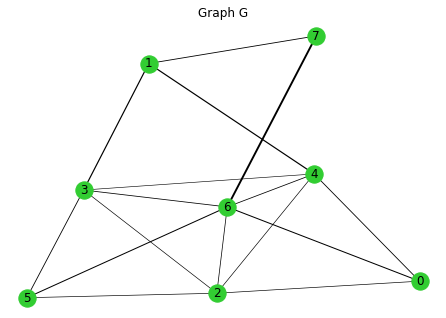

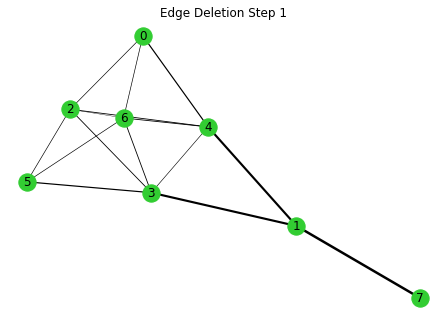

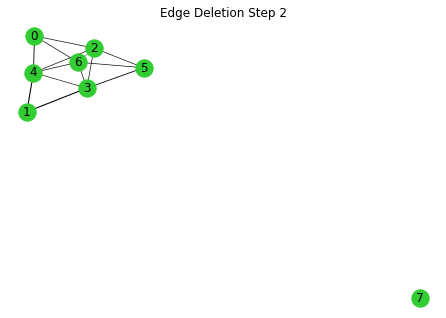

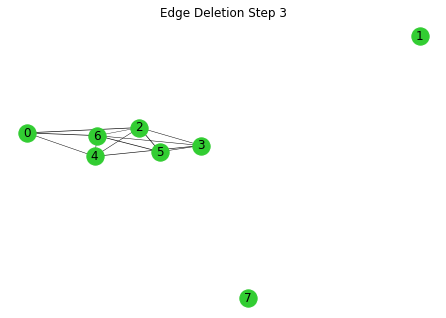

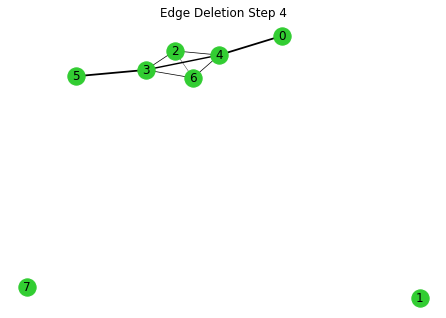

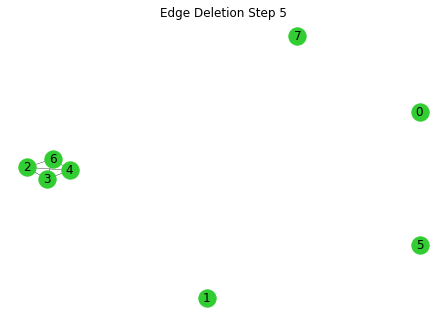

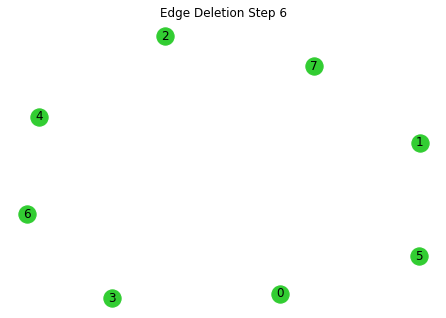

We have now found the clusters!


In [11]:
#Imports
import matplotlib.pyplot as plt
import networkx as nx

#Function to find the edges with the highest 'betweenness' value in a graph
def clusters(graph):
    edge_betweenness_dict = nx.edge_betweenness_centrality(graph) #calculates 'betweenness' of each edge and returns dictionary
    max_betweenness = 0
    max_betweenness_list = []
    for edge in edge_betweenness_dict:  #loop to find edge(s) with highest 'betweenness'
        if edge_betweenness_dict[edge] > max_betweenness:
            max_betweenness = edge_betweenness_dict[edge]
            max_betweenness_list.clear()  #clears max_betwenness_list when a larger 'betweenness' is found
            max_betweenness_list.append(edge)
        elif edge_betweenness_dict[edge] == max_betweenness: #appends each edge if multiple edges have same 'betweenness'
            max_betweenness_list.append(edge)
    return max_betweenness_list

#Function to give the values of the 'betweenness' for each edge 
def edge_weights(graph):
    edge_betweenness_dict = nx.edge_betweenness_centrality(graph)
    weight_list = []
    for edge in edge_betweenness_dict:
        weight_list.append(10*edge_betweenness_dict.get(edge))  #value multiplied by to make edges thicker when plotted
    return weight_list

#Function to remove the edges which have the highest 'betweeness' value in a graph
def remove_edges(graph,title_num):
    max_betweenness_list = clusters(graph)  #calls clusters to get list of edges with the highest 'betweenness'
    for edge in max_betweenness_list:  #loop to remove edges from the graph
        graph.remove_edge(edge[0],edge[1])
    weight_list = edge_weights(graph)  #calls edge_weights to get list of 'betweenness' values for each edge
    nx.draw(graph, node_color='limegreen', width=weight_list, with_labels=True)  #plots graph with varied edge thicknesses
    plt.title("Edge Deletion Step "+str(title_num))
    plt.show()

print("This is an example of determining the clusters in a graph using the Girvan-Newman Algorithm!")
num_vert = int(input("How many vertices in the graph? "))
G = nx.gnp_random_graph(n=num_vert, p=0.5)  #creates random graph where each possible edge has a 0.5 probability of existing
weight_list_G = edge_weights(G)  
nx.draw(G, node_color='limegreen', width=weight_list_G, with_labels=True)
plt.title("Graph G")
plt.show()

#Loop to remove the edges with the highest 'betweenness' from G each iteration until G has no edges left
title = 1
while list(G.edges) != []:
    remove_edges(G,title)
    title += 1
print("We have now found the clusters!")